# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Extrct genotypes

In [2]:
f_genotypes = "no_header_1KGP_40samples.1838.Alu.polyTE.benchmark.recode.txt"

df_g = pd.read_csv(f_genotypes, sep='\t')
df_g

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00129,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,HGSV_233,N,<DEL>,907.0,PASS,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:71:0:999:0:999:PE,SR",...,0/1:99:2:138:0:999:1:655:SR,"0/0:99:4:1:0:999:0:999:PE,SR","0/1:99:1:44:0:1:1:263:RD,SR","0/1:1:1:59:0:24:1:1:RD,SR","0/1:99:1:88:1:1:1:113:RD,PE,SR",0/1:99:2:90:0:1:1:515:SR,0/1:99:2:1:0:1:1:347:SR,"0/0:99:4:101:0:999:0:999:PE,SR","0/0:99:3:98:0:999:0:999:PE,SR","0/0:99:2:49:0:999:0:999:RD,PE,SR"
1,chr1,2994984,HGSV_432,N,<DEL>,999.0,PASS,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:999:PE,SR",...,"0/0:99:2:31:0:999:0:999:RD,PE,SR","0/1:99:1:84:0:23:1:382:RD,SR","0/1:99:1:111:0:27:1:922:RD,SR",0/1:99:2:16:0:1:1:922:SR,"1/1:99:0:112:1:1:2:439:RD,PE,SR","0/0:99:2:113:0:999:0:999:RD,PE,SR","0/1:99:1:124:0:1:1:948:RD,SR","0/0:99:2:151:0:999:0:999:RD,PE,SR","0/0:99:2:66:0:999:0:999:RD,PE,SR","0/0:99:2:71:0:999:0:999:RD,PE,SR"
2,chr1,4095099,HGSV_558,N,<DEL>,999.0,PASS,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:2:97:0:999:0:999:RD,PE,SR",...,"0/1:99:1:121:0:1:1:900:RD,SR","0/0:99:2:76:0:999:0:34:RD,PE,SR","0/1:99:1:111:0:27:1:213:RD,SR","0/0:99:2:76:0:999:0:999:RD,PE,SR","1/1:99:0:101:0:1:2:591:RD,SR","0/0:99:2:117:0:999:0:33:RD,PE,SR","0/1:99:1:124:0:1:1:898:RD,SR","0/0:99:2:97:0:999:0:999:RD,PE,SR","0/0:99:2:41:0:999:0:1:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR"
3,chr1,4211149,HGSV_574,N,<DEL>,999.0,PASS,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:102:0:999:0:999:PE,SR",...,"0/0:99:2:79:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:999:PE,SR","0/0:99:3:125:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:54:0:999:0:999:PE,SR","0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:3:143:0:999:0:999:PE,SR","0/0:99:3:44:0:999:0:999:PE,SR","0/0:99:3:96:0:999:0:999:PE,SR"
4,chr1,6669214,HGSV_798,N,<DEL>,36.0,PASS,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:29:PE,SR",...,"0/0:99:2:22:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:34:PE,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR","0/0:99:2:89:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:144:0:999:0:999:RD,PE,SR","0/0:99:3:90:0:999:0:999:PE,SR","0/0:99:2:62:0:999:0:999:RD,PE,SR","0/0:99:2:12:0:999:0:999:RD,PE,SR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,HGSV_257109,N,<DEL>,999.0,PASS,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/1:1:1:11:1:1:1:1:RD,PE,SR",...,"0/1:99:1:131:0:1:1:557:RD,SR","1/1:99:1:60:1:1:2:689:RD,PE,SR","0/1:99:1:112:0:4:1:922:RD,SR","1/1:38:1:41:1:1:2:38:RD,PE,SR","1/1:99:1:22:1:1:2:845:RD,PE,SR",0/1:1:2:85:0:22:1:1:SR,0/1:99:2:113:0:22:1:496:SR,"1/1:99:1:52:1:1:2:999:RD,PE,SR","0/1:99:1:41:1:1:1:565:RD,PE,SR","0/1:99:1:122:0:1:1:446:RD,SR"
1833,chrX,139859819,HGSV_257145,N,<DEL>,999.0,PASS,END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:1:119:0:999:0:999:PE,SR",...,"0/1:99:1:1:0:1:1:363:RD,SR","0/0:99:2:23:0:999:0:999:RD,PE,SR","0/1:99:1:1:0:1:1:364:RD,SR","1/1:99:0:76:0:999:3:565:RD,SR","0/1:99:1:88:0:4:1:973:RD,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR",1/1:99:1:92:0:22:2:746:SR,"0/0:99:2:90:0:999:0:999:RD,PE,SR","0/0:99:1:34:0:999:0:999:PE,SR","0/0:99:1:103:0:999:0:999:PE,SR"
1834,chrX,144761767,HGSV_257452,N,<DEL>,999.0,PASS,END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:1:94:0:999:0:999:PE,SR",...,"0/0:99:1:107:0:999:0:999:PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","

In [3]:
df_g.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'HG00129', 'HG00131', 'HG00150', 'HG00262', 'HG00615', 'HG00672',
       'HG01067', 'HG01353', 'HG01398', 'HG01774', 'HG02004', 'HG02080',
       'HG02136', 'HG02221', 'HG02275', 'HG02406', 'HG02409', 'HG02524',
       'HG02589', 'HG02667', 'HG02794', 'HG03305', 'HG03557', 'HG03772',
       'HG03902', 'HG03951', 'HG04131', 'HG04142', 'HG04227', 'NA12287',
       'NA18500', 'NA18532', 'NA18863', 'NA19122', 'NA19474', 'NA19653',
       'NA19734', 'NA19775', 'NA20810', 'NA20850'],
      dtype='object')

In [4]:
discard_list = df_g.columns.tolist()[2:7]
print("discard_list:",discard_list)
for discard in discard_list:
    del df_g[discard]
df_g

discard_list: ['ID', 'REF', 'ALT', 'QUAL', 'FILTER']


,#CHROM,POS,INFO,FORMAT,HG00129,HG00131,HG00150,HG00262,HG00615,HG00672,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:71:0:999:0:999:PE,SR","0/0:99:4:122:0:999:0:999:PE,SR","0/0:99:4:43:0:999:0:999:PE,SR","0/0:99:3:133:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR,...,0/1:99:2:138:0:999:1:655:SR,"0/0:99:4:1:0:999:0:999:PE,SR","0/1:99:1:44:0:1:1:263:RD,SR","0/1:1:1:59:0:24:1:1:RD,SR","0/1:99:1:88:1:1:1:113:RD,PE,SR",0/1:99:2:90:0:1:1:515:SR,0/1:99:2:1:0:1:1:347:SR,"0/0:99:4:101:0:999:0:999:PE,SR","0/0:99:3:98:0:999:0:999:PE,SR","0/0:99:2:49:0:999:0:999:RD,PE,SR"
1,chr1,2994984,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:1:73:0:999:0:999:PE,SR","0/0:99:2:68:0:999:0:999:RD,PE,SR","0/0:99:2:1:0:999:0:999:RD,PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR",...,"0/0:99:2:31:0:999:0:999:RD,PE,SR","0/1:99:1:84:0:23:1:382:RD,SR","0/1:99:1:111:0:27:1:922:RD,SR",0/1:99:2:16:0:1:1:922:SR,"1/1:99:0:112:1:1:2:439:RD,PE,SR","0/0:99:2:113:0:999:0:999:RD,PE,SR","0/1:99:1:124:0:1:1:948:RD,SR","0/0:99:2:151:0:999:0:999:RD,PE,SR","0/0:99:2:66:0:999:0:999:RD,PE,SR","0/0:99:2:71:0:999:0:999:RD,PE,SR"
2,chr1,4095099,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:128:1:1:1:314:RD,PE,SR","0/0:99:2:123:0:999:0:999:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR",...,"0/1:99:1:121:0:1:1:900:RD,SR","0/0:99:2:76:0:999:0:34:RD,PE,SR","0/1:99:1:111:0:27:1:213:RD,SR","0/0:99:2:76:0:999:0:999:RD,PE,SR","1/1:99:0:101:0:1:2:591:RD,SR","0/0:99:2:117:0:999:0:33:RD,PE,SR","0/1:99:1:124:0:1:1:898:RD,SR","0/0:99:2:97:0:999:0:999:RD,PE,SR","0/0:99:2:41:0:999:0:1:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR"
3,chr1,4211149,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:25:0:999:0:999:RD,PE,SR","0/0:99:2:110:0:999:0:999:RD,PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR",...,"0/0:99:2:79:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:999:PE,SR","0/0:99:3:125:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:54:0:999:0:999:PE,SR","0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:3:143:0:999:0:999:PE,SR","0/0:99:3:44:0:999:0:999:PE,SR","0/0:99:3:96:0:999:0:999:PE,SR"
4,chr1,6669214,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:147:0:999:0:999:RD,PE,SR","0/0:99:2:134:0:999:0:999:RD,PE,SR","0/0:99:2:143:0:999:0:999:RD,PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR",...,"0/0:99:2:22:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:34:PE,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR","0/0:99:2:89:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:144:0:999:0:999:RD,PE,SR","0/0:99:3:90:0:999:0:999:PE,SR","0/0:99:2:62:0:999:0:999:RD,PE,SR","0/0:99:2:12:0:999:0:999:RD,PE,SR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/1:1:1:11:1:1:1:1:RD,PE,SR","0/1:99:1:1:0:3:1:606:RD,SR","1/1:99:1:116:1:1:2:417:RD,PE,SR","0/1:99:1:94:1:1:1:753:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR",...,"0/1:99:1:131:0:1:1:557:RD,SR","1/1:99:1:60:1:1:2:689:RD,PE,SR","0/1:99:1:112:0:4:1:922:RD,SR","1/1:38:1:41:1:1:2:38:RD,PE,SR","1/1:99:1:22:1:1:2:845:RD,PE,SR",0/1:1:2:85:0:22:1:1:SR,0/1:99:2:113:0:22:1:496:SR,"1/1:99:1:52:1:1:2:999:RD,PE,SR

In [5]:
HG_list = df_g.columns.tolist()[4:]
for sample in HG_list:
    df_g[sample] = df_g[sample].str.split(":", expand=True)[0]
df_g

,#CHROM,POS,INFO,FORMAT,HG00129,HG00131,HG00150,HG00262,HG00615,HG00672,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/1,0/1,0/1,0/0,0/0,0/0
1,chr1,2994984,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,1/1,...,0/0,0/1,0/1,0/1,1/1,0/0,0/1,0/0,0/0,0/0
2,chr1,4095099,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/1,0/0,0/0,0/1,0/0,...,0/1,0/0,0/1,0/0,1/1,0/0,0/1,0/0,0/0,0/0
3,chr1,4211149,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,chr1,6669214,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/1,0/1,1/1,0/1,1/1,0/1,...,0/1,1/1,0/1,1/1,1/1,0/1,0/1,1/1,0/1,0/1
1833,chrX,139859819,END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/1,...,0/1,0/0,0/1,1/1,0/1,0/0,1/1,0/0,0/0,0/0
1834,chrX,144761767,END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1835,chrX,146248394,END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/1,0/1,0/0,0/1,1/1,...,0/1,1/1,0/0,1/1,0/1,1/1,0/1,0/0,0/1,0/0


### Manipulate files

In [170]:
# Create a list of samples to work with
samples_list = ["HG00129", "HG00615", "HG00672"]

df = pd.DataFrame(columns=['locus', 'position', 'end', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_pairs',
       'ALT_grey_pairs', 'Total_grey_pairs', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])

for sample in samples_list:
    print("sample!!!!: ", sample)
    f_features = "features/" + sample + "_features.txt"
    # print(f_features)
    colnames = ["locus",
                  "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                  "REF_grey_pairs","ALT_grey_pairs", "Total_grey_pairs",
                  "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                  "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = pd.read_csv(f_features, sep=',', names=colnames)
    df_f[["locus", "position"]] = df_f["locus"].str.split(":", 1, expand=True)
    
    #Move last column to first column
    new_cols =  ["locus", "position",
                      "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                      "REF_grey_pairs","ALT_grey_pairs", "Total_grey_pairs",
                      "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                      "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = df_f.reindex(columns=new_cols)
    
    # Sort the feature df
    df_f = df_f.sort_values(["locus", "position"], ascending=["True","True"])
    
    df_f[["position", "end"]] = df_f["position"].str.split("-", 1, expand=True)
    #Move last column to first column
    new_cols =  ["locus", "position", "end",
                      "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                      "REF_grey_pairs","ALT_grey_pairs", "Total_grey_pairs",
                      "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                      "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = df_f.reindex(columns=new_cols)
    
    # Sort the feature df
    df_f.position = df_f.position.astype(int)
    df_f = df_f.sort_values(["locus", "position"], ascending=["True","True"])
    
    # Sort the genotypes df
    df_g.POS = df_g.POS.astype(int)
    df_g = df_g.sort_values(["#CHROM", "POS"], ascending=["True", "True"])
    
    df_f = df_f.reset_index(drop=True)
    
    df_g_f = pd.concat([df_g, df_f], axis=1)
    
    df_g_f.iloc[:, -12:] = df_g_f.iloc[:, -12:].astype(int)
    
    HG_NA_list = df_g_f.columns.to_list()[4:-15]
    # print(HG_NA_list)
    for HG_NA in HG_NA_list:
        df_g_f[HG_NA] = df_g_f[HG_NA].map({"0/0":0,
                                 "0/1":1,
                                 "1/1":2,
                                 "./.":3,
                                 np.nan:4},
                                 na_action=None)
    df_sample = df_g_f[['locus', 'position', 'end', sample, 'REF_grey_reads',
   'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_pairs',
   'ALT_grey_pairs', 'Total_grey_pairs', 'REF_bkpt_r', 'REF_bkpt_l',
   'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']]
    df_sample = df_sample.rename(columns={sample:'genotype'})
    df_sample["genotype"] = df_sample["genotype"].astype(int)
    #print("df_sample")
    #print(df_sample)
    
    df_balanced = pd.DataFrame(columns=['locus', 'position', 'end', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_pairs',
       'ALT_grey_pairs', 'Total_grey_pairs', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])
    for i in range(3):
        # df_sampled = df[df["genotype"] == i].sample(n=3)
        df_balanced = pd.concat([df_balanced, df_sample[df_sample["genotype"] == i].sample(n=400)])

    df = pd.concat([df, df_balanced])    
    print("df dim:", df.shape)

sample!!!!:  HG00129
df dim: (1200, 16)
sample!!!!:  HG00615
df dim: (2400, 16)
sample!!!!:  HG00672
df dim: (3600, 16)


In [171]:
df

,locus,position,end,genotype,REF_grey_reads,ALT_grey_reads,TOTAL-grey_reads,REF_grey_pairs,ALT_grey_pairs,Total_grey_pairs,REF_bkpt_r,REF_bkpt_l,ALT_bkpt,REF_fragment_l,REF_fragment_r,ALT_fragment
1219,chr4,165546860,165547176,0,112,1,120,98,0,98,24,10,0,27,28,1
1323,chr5,99249714,99250030,0,135,0,142,126,0,126,32,29,0,39,39,1
128,chr10,8740016,8740358,0,112,1,120,84,0,84,10,36,1,14,29,1
708,chr19,4463955,4464279,0,123,0,130,108,0,108,20,30,0,24,37,1
1476,chr6,124139070,124139401,0,133,0,140,120,0,120,14,30,0,29,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,chr13,105055740,105056096,2,1,68,76,0,66,66,0,0,35,1,1,33
109,chr1,228384460,228384803,2,5,77,89,4,76,80,0,0,40,1,1,38
465,chr14,33820830,33821181,2,1,59,67,0,54,54,0,0,33,1,1,27
992,chr3,23722567,23722912,2,2,57,66,0,56,56,0,0,30,1,1,28


### Specify the sample(s) to work with! 

In [180]:
y = df["genotype"].astype(int).to_numpy()
print(y)
print(y.shape)
X = df.iloc[:, 4:].astype(int).to_numpy()
print(X)
print(X.shape)

[0 0 0 ... 2 2 2]
(3600,)
[[112   1 120 ...  27  28   1]
 [135   0 142 ...  39  39   1]
 [112   1 120 ...  14  29   1]
 ...
 [  1  59  67 ...   1   1  27]
 [  2  57  66 ...   1   1  28]
 [  0  40  47 ...   1   1  16]]
(3600, 12)


### A function for plotting the importance of features

In [181]:
features_names = ['REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads',
                  'REF_grey_pairs','ALT_grey_pairs', 'Total_grey_pairs',
                  'REF_bkpt_r', 'REF_bkpt_l', 'ALT_bkpt',
                  'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']

## May need to be careful
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[145,   0, 152, ...,  46,  40,   1],
       [125,   1, 133, ...,  37,  30,   1],
       [ 90,   0,  97, ...,  34,  34,   1],
       ...,
       [108,   0, 115, ...,  24,  24,   1],
       [ 79,  23, 109, ...,  18,  19,  11],
       [  2,  51,  60, ...,   1,   1,  24]])

In [183]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [184]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[228   2   0]
 [  6 194  50]
 [  2  15 223]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       230
           1       0.92      0.78      0.84       250
           2       0.82      0.93      0.87       240

    accuracy                           0.90       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.90      0.90      0.89       720

0.8958333333333334


[[ 2.50013661 -3.37234856 -0.85430237  1.44320382 -2.9031431  -1.44512847
   0.380446    0.76541094 -1.88319491  0.79096503  0.4124515  -1.11065476]
 [-0.75613979  0.8049338   0.00544271 -0.27968304  1.55970145  1.24416786
  -0.39795022 -0.44872798  0.04974386 -0.09976644 -0.19454444 -0.16232117]
 [-1.74399682  2.56741476  0.84885967 -1.16352079  1.34344166  0.20096061
   0.01750422 -0.31668296  1.83345105 -0.6911986  -0.21790706  1.27297593]]


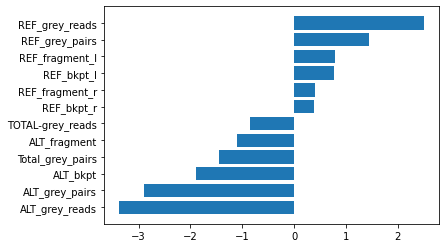

In [186]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [187]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

0.8975694444444444


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [189]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [190]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[223   1   0]
 [  4 218  19]
 [  0  18 237]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       224
           1       0.92      0.90      0.91       241
           2       0.93      0.93      0.93       255

    accuracy                           0.94       720
   macro avg       0.94      0.94      0.94       720
weighted avg       0.94      0.94      0.94       720

0.9416666666666667


In [191]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

0.9274305555555555


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [132]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [134]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [135]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

0.9244571078526


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[[ 1.78423696e+00 -2.86222083e+00 -1.07798387e+00  9.97905591e-01
  -2.45068978e+00 -1.45278419e+00  1.79092531e-01  2.55284042e-01
  -1.85809833e+00  6.61024734e-02  1.35933531e-01 -9.15209997e-01]
 [ 1.78302125e+00 -1.57446570e+00  2.08555552e-01  7.32568699e-01
  -1.37900333e+00 -6.46434627e-01  7.60226089e-01  7.99255994e-01
  -7.69529252e-01 -8.43365465e-04  6.77107546e-02 -6.06005635e-01]
 [ 2.47950102e-01 -3.65368818e-01 -1.17418717e-01  1.31755685e-01
  -3.65724203e-01 -2.33968518e-01  1.08798842e-01  1.07651761e-01
  -2.80917554e-01 -1.88211792e-01  1.37208415e-02 -3.56591837e-01]
 [ 7.37609519e-01 -1.22846485e+00 -4.90855333e-01  3.85313622e-01
  -1.81931359e-01  2.03382263e-01  4.43991353e-01  2.93268217e-02
  -1.72510915e+00  2.38336145e-02  4.03250699e-01 -6.91226555e-01]
 [ 3.02977462e-03 -4.64732858e-03 -1.61755396e-03 -1.55013319e-03
  -2.97387429e-03 -4.52400748e-03 -3.76680224e-04 -1.93285486e-04
   1.41582741e-02  8.53677715e-03  8.47827695e-03  1.30592245e-02]
 [-5.

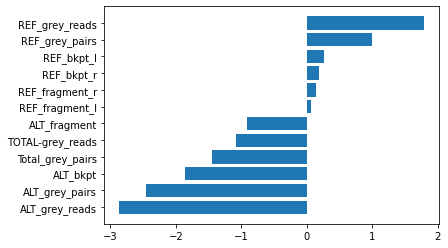

array([0, 0, 0, ..., 1, 0, 1])

In [136]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [137]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[550   0   0   0]
 [ 15 230  36   0]
 [  4  20 247   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       550
           1       0.92      0.82      0.87       281
           2       0.87      0.91      0.89       271
           3       0.00      0.00      0.00         1

    accuracy                           0.93      1103
   macro avg       0.69      0.68      0.69      1103
weighted avg       0.93      0.93      0.93      1103

0.9310970081595649


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using rbf (with non-linear boundary) as kernel

In [138]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.933756991256586


## DNN - Deep Neural Network

In [79]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

ValueError: Shape of passed values is (1837, 12), indices imply (1837, 3)

In [ ]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "0/1", "1/1", "./."])
df_GIAB_2_y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(10, activation='relu', name='layer_3')) # tahn
    model.add(Dense(4, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

In [ ]:
history = estimator.fit(X_train, y_train)

In [ ]:
history.history["accuracy"]

In [ ]:
history.history["loss"]

In [ ]:
estimator.predict(X_test)

In [ ]:
y_test

In [ ]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

In [ ]:
y_test = y_test2["genotype"].to_numpy()

In [ ]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [ ]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [80]:
model().fit(X_train, y_train, epochs=200)

NameError: name 'model' is not defined

In [ ]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 